# Quiz : Social Network Analysis

## 215518X DISSANAYAKA Y.C.B.J.

Import the libraries 

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 120)

1.Load the public dataset (SNAP Facebook dataset)

In [5]:
df = pd.read_csv('facebook.csv', names=['source', 'target'])
display(df.head())

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


2. Construct the Graph

In [7]:
G = nx.from_pandas_edgelist(df, source='source', target='target', create_using=nx.Graph())

print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

Nodes: 4039
Edges: 88234


A helper function to show ranked outputs

In [9]:
def show_top(title, metric_dict, col_name, k=10):
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))
    df_metric = pd.DataFrame(metric_dict.items(), columns=["node", col_name])
    df_metric = df_metric.sort_values(col_name, ascending=False).reset_index(drop=True)
    display(df_metric.head(k))

3.Perform Link Analysis

i.Degree Centrality

ii.Closeness Centrality

iii.Betweenness Centrality

iv.Eigenvector Centrality

v.Local Clustering Coefficient

i.Node-level measures

In [10]:
degree_dict = dict(G.degree())
degree_cent = nx.degree_centrality(G)
degree_dict
show_top("Top Degree (Most Friends)", degree_dict, "degree")


Top Degree (Most Friends)


,node,degree
0,107,1045
1,1684,792
2,1912,755
3,3437,547
4,0,347
5,2543,294
6,2347,291
7,1888,254
8,1800,245
9,1663,235


Node-Level Measures - Closeness Centrality

In [11]:
closeness_cent = nx.closeness_centrality(G)
show_top("Top Closeness Centrality", closeness_cent, "closeness")

harmonic_cent = nx.harmonic_centrality(G)
show_top("Top Harmonic Centrality", harmonic_cent, "harmonic")


Top Closeness Centrality


,node,closeness
0,107,0.459699
1,58,0.397402
2,428,0.394837
3,563,0.393913
4,1684,0.393606
5,171,0.370493
6,348,0.369916
7,483,0.369848
8,414,0.369543
9,376,0.366558



Top Harmonic Centrality


,node,harmonic
0,107,2287.483333
1,1684,1984.916667
2,1912,1808.716667
3,58,1763.233333
4,428,1732.566667
5,563,1720.566667
6,0,1689.983333
7,483,1660.650000
8,348,1660.316667
9,1577,1651.483333


Node-Level Measures - Betweenness Centrality

In [12]:
betweenness = nx.betweenness_centrality(G, k=100, normalized=True, seed=42)

show_top("Top Betweenness (Bridges)", betweenness, "betweenness")


Top Betweenness (Bridges)


,node,betweenness
0,107,0.497134
1,1684,0.345842
2,1912,0.235930
3,3437,0.187493
4,0,0.157313
5,1085,0.131142
6,698,0.092612
7,58,0.091865
8,567,0.075884
9,428,0.061589


Node-Level Measures - Eigenvector Centrality

In [13]:
try:
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
    show_top("Top Eigenvector (Influencers)", eigenvector, "eigenvector")
except:
    print("Eigenvector did not converge, using PageRank as a fallback.")
    eigenvector = nx.pagerank(G)
    show_top("Top PageRank", eigenvector, "pagerank")


Top Eigenvector (Influencers)


,node,eigenvector
0,1912,0.095407
1,2266,0.086983
2,2206,0.086052
3,2233,0.085173
4,2464,0.084279
5,2142,0.084193
6,2218,0.084156
7,2078,0.084136
8,2123,0.083671
9,1993,0.083532


Node-Level Measures - Local Clustering Coefficient

In [14]:
clustering = nx.clustering(G)
show_top("Top Clustering (Tight Groups)", clustering, "clustering")


Top Clustering (Tight Groups)


,node,clustering
0,4025,1.0
1,4036,1.0
2,4034,1.0
3,4016,1.0
4,4012,1.0
5,4007,1.0
6,4006,1.0
7,1224,1.0
8,1233,1.0
9,1252,1.0


## 4. Answer the following questions based on your network analysis.

In [15]:
avg_deg = sum(dict(G.degree()).values()) / G.number_of_nodes()
top_influencer = sorted(eigenvector, key=eigenvector.get, reverse=True)[0]
top_bridge = sorted(betweenness, key=betweenness.get, reverse=True)[0]
avg_clustering_val = nx.average_clustering(G)

print(f"1. Who is the most influential person in your network? (Eigenvector): Node {top_influencer}")
print(f"2. Who acts as a bridge between communities? (Betweenness): Node {top_bridge}")
print(f"3. Are your friends tightly connected or loosely connected? (Avg Clustering): {avg_clustering_val:.4f}")
print(f"   (A higher value like >0.5 suggests tight connections, lower suggests loose)")

max_deg = max(dict(G.degree()).values())
print(f"4. Is your network centralized or distributed?")
print(f"   Max Degree: {max_deg}, Average Degree: {avg_deg:.2f}")
if max_deg > (avg_deg * 5):
    print("   Result: The network appears Centralized (few people have very many connections).")
else:
    print("   Result: The network appears Distributed.")

1. Who is the most influential person in your network? (Eigenvector): Node 1912
2. Who acts as a bridge between communities? (Betweenness): Node 107
3. Are your friends tightly connected or loosely connected? (Avg Clustering): 0.6055
   (A higher value like >0.5 suggests tight connections, lower suggests loose)
4. Is your network centralized or distributed?
   Max Degree: 1045, Average Degree: 43.69
   Result: The network appears Centralized (few people have very many connections).


## 5. Draw the network using spring layout and highlight

Top 5 Influencers to highlight: [1912, 2266, 2206, 2233, 2464]


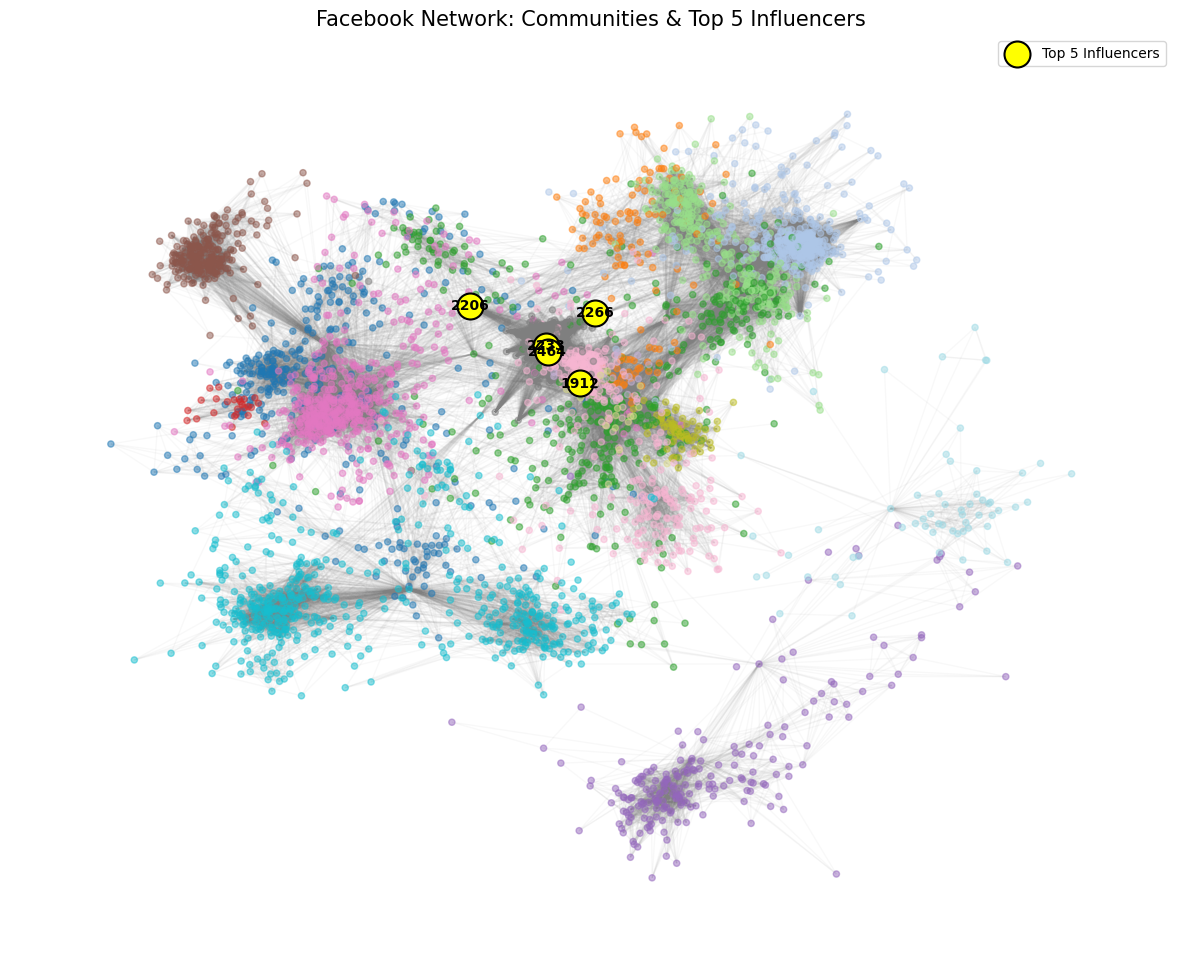

In [17]:
communities = nx.community.louvain_communities(G, seed=42)
community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i
node_colors = [community_map.get(n, 0) for n in G.nodes()]
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, k=0.15, seed=42)
nx.draw_networkx_edges(G, pos, alpha=0.05, edge_color='gray')

nx.draw_networkx_nodes(G, pos,
                       node_color=node_colors,
                       cmap=plt.cm.tab20,
                       node_size=20,
                       alpha=0.5)

top_5_influencers = sorted(eigenvector, key=eigenvector.get, reverse=True)[:5]
print(f"Top 5 Influencers to highlight: {top_5_influencers}")

nx.draw_networkx_nodes(G, pos, nodelist=top_5_influencers, node_size=350,
                       node_color='yellow', edgecolors='black', linewidths=1.5, label='Top 5 Influencers')

labels = {node: str(node) for node in top_5_influencers}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold', font_color='black')

plt.title("Facebook Network: Communities & Top 5 Influencers", fontsize=15)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

## 6. Bonus mark Question

If this top influential node is removed, how does the network structure change?

In [18]:
def avg_path_length(graph):
    if not nx.is_connected(graph):
        largest_cc = max(nx.connected_components(graph), key=len)
        subgraph = graph.subgraph(largest_cc)
        return nx.average_shortest_path_length(subgraph)
    return nx.average_shortest_path_length(graph)


path_len_before = avg_path_length(G)
print(f"Avg Path Length (Before): {path_len_before:.4f}")

G_broken = G.copy()
G_broken.remove_node(top_influencer)
print(f"Removed Top Influencer Node: {top_influencer}")

path_len_after = avg_path_length(G_broken)
print(f"Avg Path Length (After):  {path_len_after:.4f}")

change = ((path_len_after - path_len_before) / path_len_before) * 100
print(f"Percent Change: {change:.2f}%")

Avg Path Length (Before): 3.6925
Removed Top Influencer Node: 1912
Avg Path Length (After):  3.9281
Percent Change: 6.38%
